#Capstone project: Providing data-driven suggestions for HR
This capstone project of Google Advanced Data Science Certificate Programm is an opportunity for me to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

###Business scenario
The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

My goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.


In [135]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_original = pd.read_csv('/content/drive/MyDrive/datasets/HR_capstone_dataset.csv')

##EDA

In [3]:
df_original.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df_original.shape

(14999, 10)

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Dataset contains information about 15 000 emplyees with 10 attributes.

In [7]:
df_original.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


- Seems like majority of employees works for sales department.
- Approximately half's salary level is low.

In [12]:
unique_values_per_column = df_original.apply(pd.Series.unique)
unique_values_per_column

satisfaction_level       [0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92,...
last_evaluation          [0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85...
number_project                                          [2, 5, 7, 6, 4, 3]
average_montly_hours     [157, 262, 272, 223, 159, 153, 247, 259, 224, ...
time_spend_company                               [3, 6, 4, 5, 2, 8, 10, 7]
Work_accident                                                       [0, 1]
left                                                                [1, 0]
promotion_last_5years                                               [0, 1]
Department               [sales, accounting, hr, technical, support, ma...
salary                                                 [low, medium, high]
dtype: object

- Value of number of projects ranges between 2 and 7
-*salary* includes ordinal attributes [low, medium, high]
- *Work_accident*, *left*, *promotion_last_5years* has binary attributes
- other columns include numeric attributes

As a data cleaning step we need to rename some columns according to `snake_case`

In [9]:
df_original.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [13]:
df_original = df_original.rename(columns = {'average_montly_hours':'average_monthly_hours',
                                            'Work_accident':'work_accident',
                                            'Department':'department',
                                            'time_spend_company':'tenure'})

In [14]:
df_original.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Also we need to check for missing values

In [15]:
df_original.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values on data.

So next we need to check duplicates

In [17]:
df_original.duplicated().sum()

3008

In [20]:
df_original[df_original.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [21]:
df0 = df_original.drop_duplicates(keep = 'first')

In [22]:
df0.shape

(11991, 10)

We discover 3008 duplicates and dropped them.

As next step of data cleaning we need to check outliers. One of most common approaches is plotting boxplot.

Text(0.5, 0, 'Tenure')

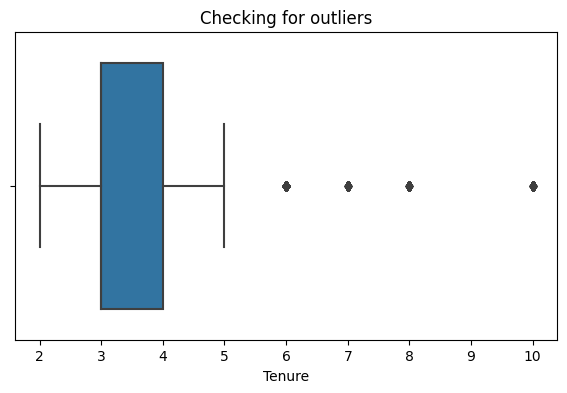

In [25]:
plt.figure(figsize=(7,4))
sns.boxplot(x = df0['tenure'])
plt.title('Checking for outliers')
plt.xlabel('Tenure')

We see that we have some outliers in tenure column.

In [26]:
percentile25 = df0['tenure'].quantile(0.25)
percentile75 = df0['tenure'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Upper limit:  ',upper_limit)
print('Lower limit:  ',lower_limit)

outliers = df0[(df0['tenure'] < lower_limit) | (df0['tenure'] > upper_limit)]
print('Number of outliers in df0[\'tenure\']: ',len(outliers))


Upper limit:   5.5
Lower limit:   1.5
Number of outliers in df0['tenure']:  824


Let's explore how many emplyees are left and what percentage is.

In [31]:
print('LEFT: ',df0[df0['left']==1].shape[0])
print('STAYED: ',df0[df0['left']==0].shape[0])

LEFT:  1991
STAYED:  10000


In [34]:
print('Percentage: ','\n', df0['left'].value_counts(normalize = True))

Percentage:  
 0    0.833959
1    0.166041
Name: left, dtype: float64


We see that about 16% are left.

Then we can explore dataset using a graphs

In [36]:
df0.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [80]:
df1 = df0.copy()


df1.loc[df1['satisfaction_level']<0.3, 'satisfaction_level_categories' ]= 'very low'
df1.loc[(df1['satisfaction_level']>=0.3) & (df1['satisfaction_level']<0.4) , 'satisfaction_level_categories' ]= 'low'
df1.loc[(df1['satisfaction_level']>=0.4) & (df1['satisfaction_level']<=0.5), 'satisfaction_level_categories' ]= 'medium'
df1.loc[(df1['satisfaction_level']>0.5) & (df1['satisfaction_level']<=0.65), 'satisfaction_level_categories' ]= 'upper middle'
df1.loc[(df1['satisfaction_level']>0.65) & (df1['satisfaction_level']<=0.85), 'satisfaction_level_categories' ]= 'good'
df1.loc[(df1['satisfaction_level']>0.85) & (df1['satisfaction_level']<=1), 'satisfaction_level_categories' ]= 'very good'

In [83]:
ordered = ['very low','low','medium','good','very good']

<Axes: xlabel='satisfaction_level_categories', ylabel='Count'>

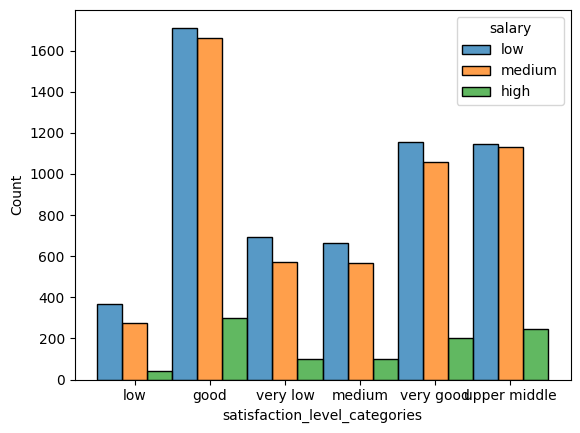

In [98]:
sns.histplot(data = df1, x = 'satisfaction_level_categories', hue = 'salary', multiple = 'dodge', shrink = 1)


The satisfaction levels are quite balanced. The hypothethis that low satisfaction level corresponded to low salary employees is rejected.

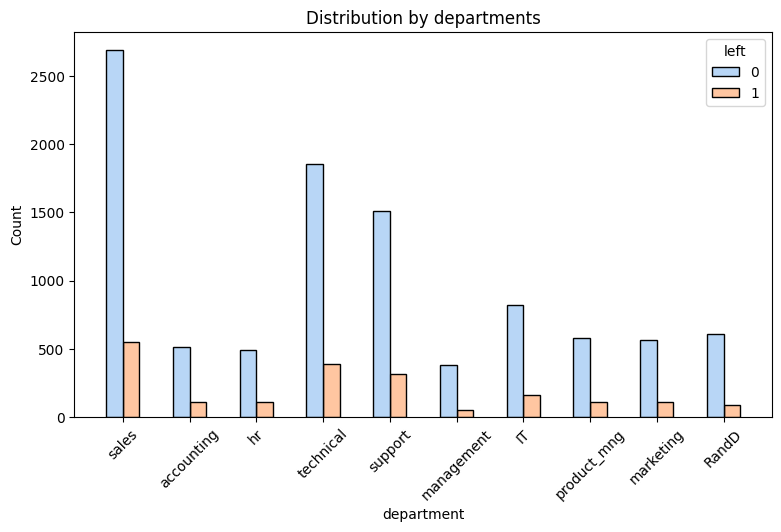

In [116]:
plt.figure(figsize=(9,5))
sns.histplot(data = df1, x = 'department', hue = 'left', multiple='dodge', shrink=0.5, discrete=1,palette='pastel')
plt.title('Distribution by departments')
plt.xticks(rotation=45)
plt.show()

The most part of employees who left from **sales** department and also **technical**, **support** departments.

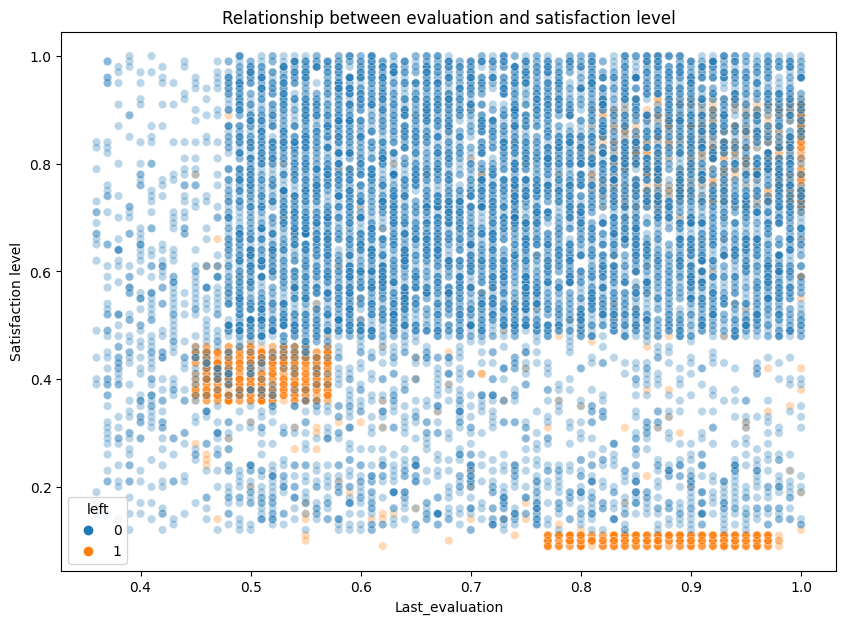

In [127]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df1, x='last_evaluation', y='satisfaction_level', hue='left',alpha=0.3)
plt.title('Relationship between evaluation and satisfaction level')
#plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.xlabel('Last_evaluation')
plt.ylabel('Satisfaction level')
plt.show()

This graph divides fired employees into three groups:
 - who has low evaluation and low satisfaction
 - who has high evaluation and low satisfaction
 - who has high evaluation and high satisfaction

I suspect that first group belongs to group of employees with low hours, who was inexperienced. But according to two groups correlation between evaluation and satisfaction is rejected.

<Axes: xlabel='number_project', ylabel='Count'>

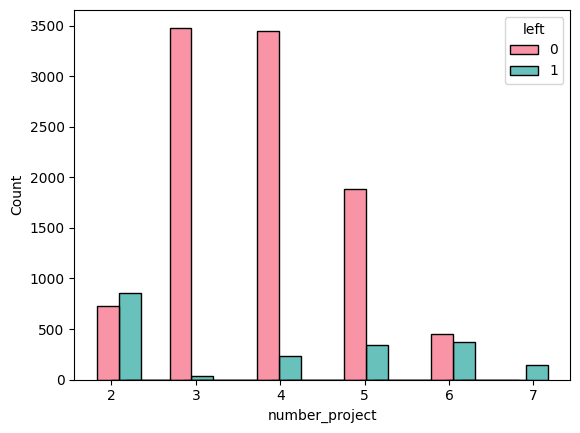

In [61]:
sns.histplot(data = df0, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 3, palette = 'husl')

As we see, the most left employees had 2, 5 and 6 projects. Seems like 3-4 projects are more optimal.

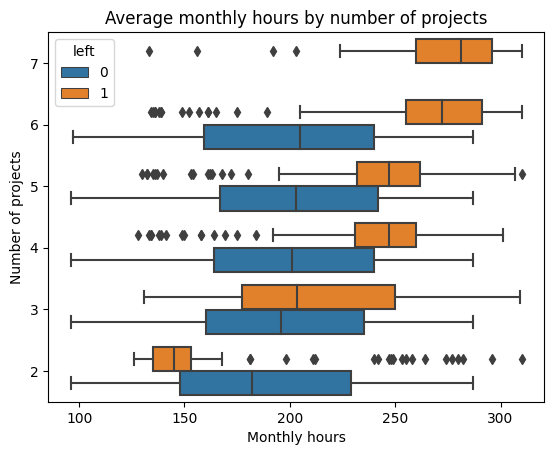

In [67]:
#fig = plt.figure(figsize = (7,4))
sns.boxplot(data = df0, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h')
plt.gca().invert_yaxis()
plt.title('Average monthly hours by number of projects')
plt.xlabel('Monthly hours')
plt.ylabel('Number of projects')
plt.show()

 - All employees who worked 7 hours are left. Consequently they have the maximum hours.
 - If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working `Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees **who worked on two projects**, every group—even those who didn't leave the company—worked considerably more hours than this. **It seems that employees here are overworked.**

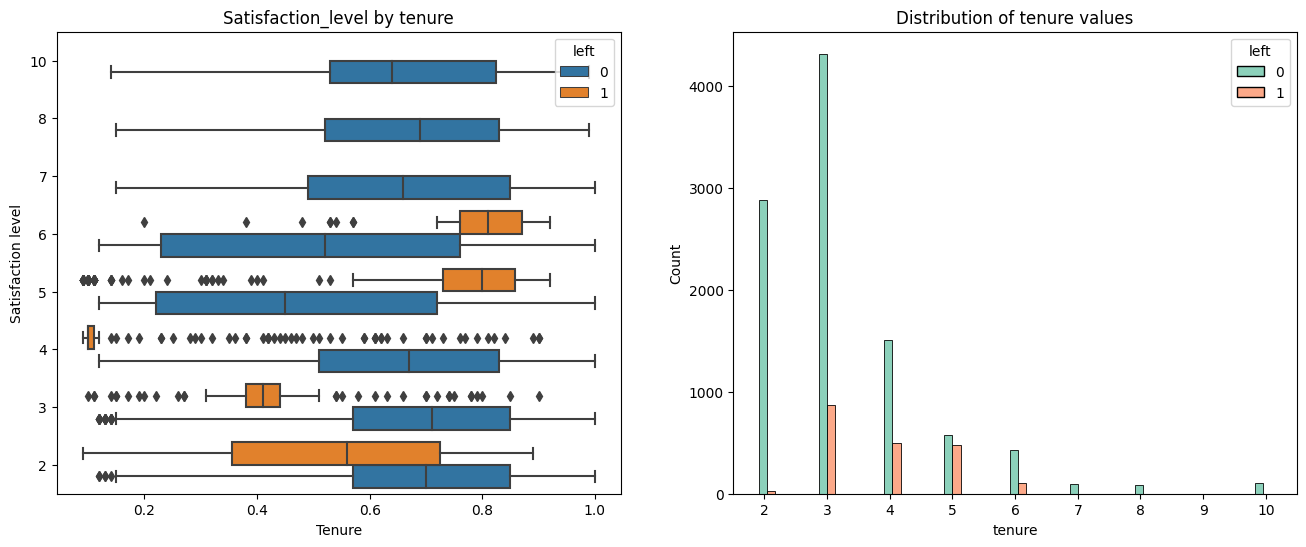

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (16,6))
sns.boxplot(data = df0, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = 'h', ax = ax[0])
ax[0].set_title('Satisfaction_level by tenure')
ax[0].invert_yaxis()
ax[0].set_xlabel('Tenure')
ax[0].set_ylabel('Satisfaction level')

sns.histplot(data = df0, x = 'tenure', hue = 'left', palette = 'Set2', multiple = 'dodge', shrink = 3, ax=ax[1] )
ax[1].set_title('Distribution of tenure values')
plt.show()



We see that significant count of employees who left and which had two projects are have low satisfaction level. It seems like they are fired and they was inexperiensed employees.
In histogramm we are watching that long tenured employers very few

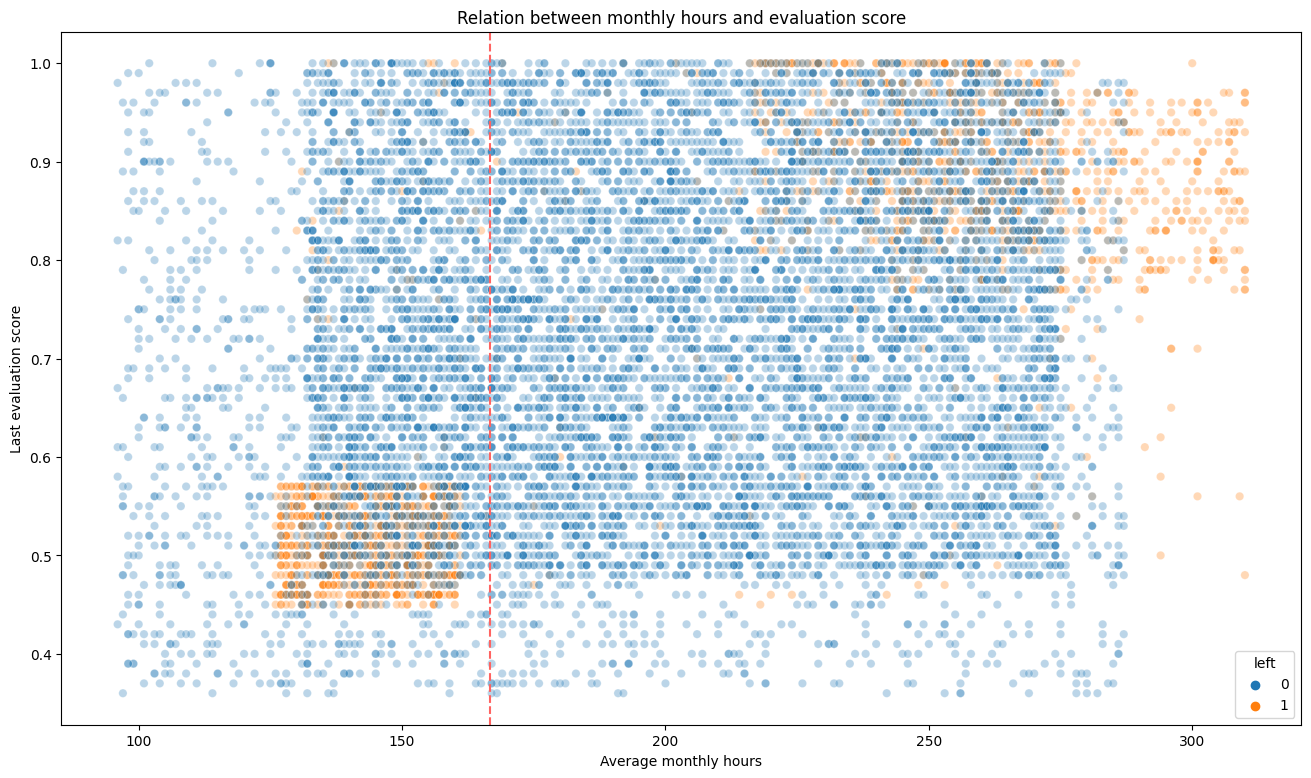

In [104]:
plt.figure(figsize = (16,9))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.3)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.xlabel('Average monthly hours')
plt.ylabel('Last evaluation score')
plt.title('Relation between monthly hours and evaluation score')

plt.show()

We see that:
 - left employees divivde into two groups: who worked less than standard hours and who overworked
 - who worked less and left has low evaluation score
 - majority of who left and overworked has high evaluation scores
 - exists a bit of correlation between hours and evaluation scores

<ipython-input-129-60f4edb663c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True,cmap=sns.color_palette("dark:#5A9_r", as_cmap=True))


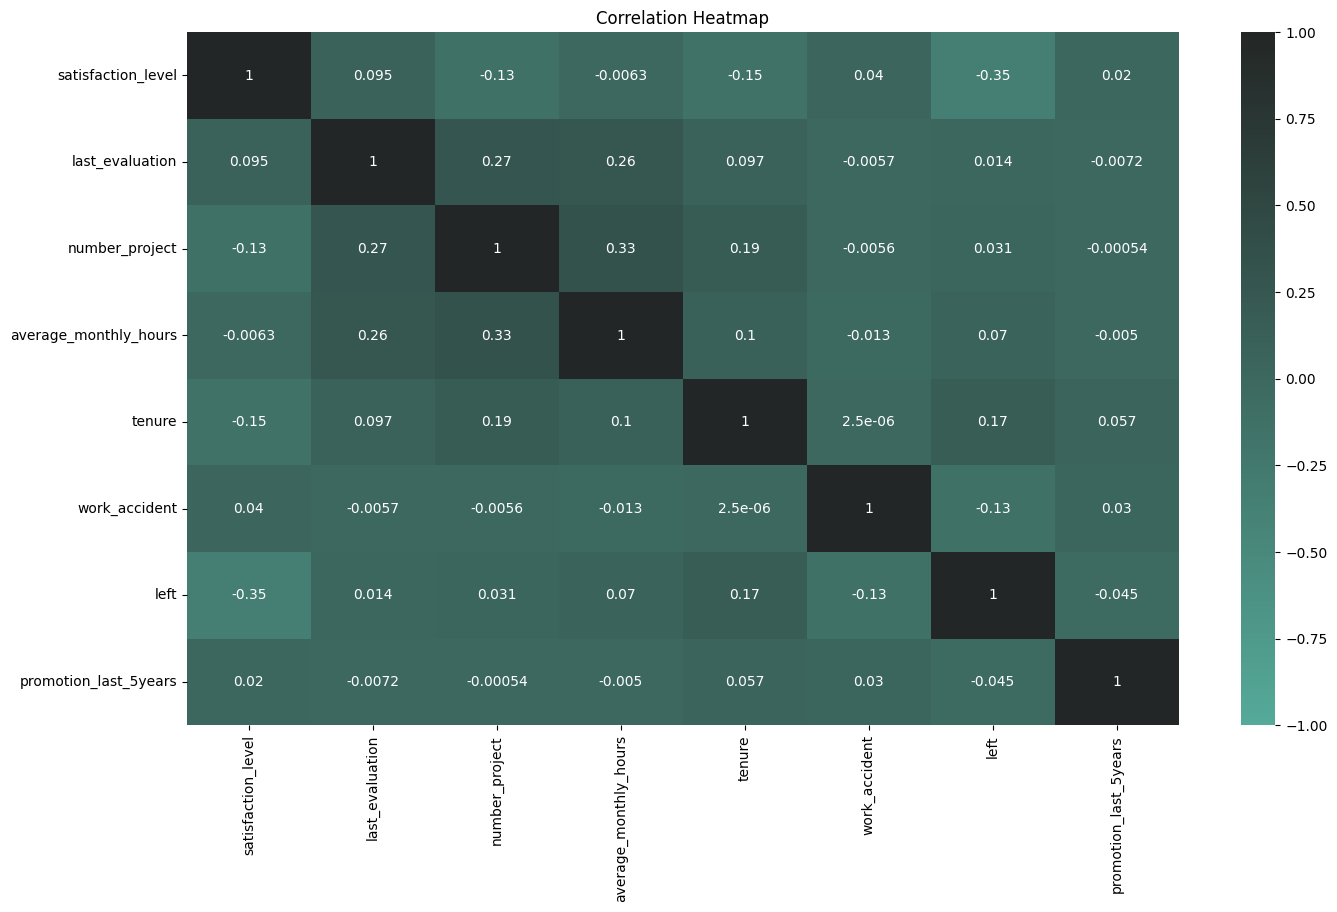

In [129]:
plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True,cmap=sns.color_palette("dark:#5A9_r", as_cmap=True))
plt.title('Correlation Heatmap')
plt.show()

We see quite a bit of correlation between average number hours and number of projects, but it is understandable, because if number projects is more then correspondingly high average number hours.We also see negative correlation between satisfaction level and count of left employees. We don't see significant correlation between others

##Modeling

First, we can try to construct logistic regression model

In [130]:
df2=df0.copy()
df2['salary']=( df2['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes)

In [131]:
df2=pd.get_dummies(df2, drop_first=False)
df2.head(n=10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


We prepared categorical variables to constructing classification models.
**Because logistic regression models are sensitive to outliers we need to remove them**. Earlier we find outliers in **tenure** column.

In [134]:
log_reg_df = df2[(df2['tenure']>=lower_limit) & (df2['tenure']<=upper_limit)]

##Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve,classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay


In [137]:
y=log_reg_df['left']
X=log_reg_df.drop('left',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

We split data to train and test sets. Also specified y to stratify target set for avoiding problem with small count of target values when random splitting.

In [138]:
log_reg_clf = LogisticRegression(random_state=42, max_iter=500)

In [139]:
log_reg_clf.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=42)

In [140]:
y_pred = log_reg_clf.predict(X_test)

We trained and made predictions. As the next step we can construct confusion matrix to evaluate our classifier.

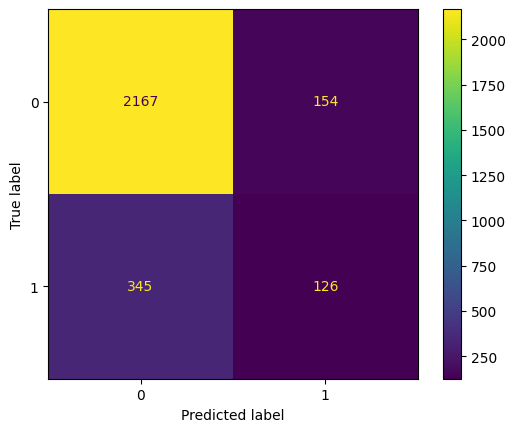

In [141]:
cm = confusion_matrix(y_test, y_pred, labels = log_reg_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = log_reg_clf.classes_)
disp.plot(values_format = '')

Our model predicts more TRUE NEGATIVES. And small values of TP, FP, FN.
 - TN: Who didn't leave and model truly predicts that didn't leave
 - TP: Who left and model truly predicts that left
 - FN: Who left but model falsely predicts that didn't leaved.
 - FP: Who didn't leave but model falsely predicts that left.

In [144]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.27      0.34       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792



Logistic Regression Classifier predicts with average precision 79%, recall 82%, f1 score 80% and accuracy 82%. Model predicted with high accuracy the group who wouldn't leave. But for analysis most important to predict employees who would leave. We can use another approach. For example,tree based methods.

## Decision Tree Classififer

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
dec_tree=DecisionTreeClassifier(random_state=0)
cv_params_tree = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring = ['accuracy','precision','recall','f1']

cv_tree=GridSearchCV(dec_tree,cv_params_tree, scoring = scoring, cv=5,refit='f1')

In [148]:
%%time
cv_tree.fit(X_train,y_train)

CPU times: user 6.37 s, sys: 16.9 ms, total: 6.39 s
Wall time: 6.53 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [149]:
cv_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [151]:
cv_tree.best_score_

0.9453751440087889

In [156]:
def make_results(model_name:str, model_object, metric:str):


    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row

    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],

                        })

    return table

In [157]:
tree1_cv_results = make_results('decision tree cv', cv_tree, 'f1')
tree1_cv_results

,model,precision,recall,F1,accuracy
0,decision tree cv,0.978197,0.914936,0.945375,0.982209


Our model predicts with high accuracy but we know that decision trees are vulnerable to overfitting. We can use another tree based method which can avoid overfitting by constructing several trees and make prediction with majority voting.

##Random Forest Classifier

In [161]:
rf = RandomForestClassifier(random_state = 0)

cv_params_rf = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

rf_scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

cv_rf = GridSearchCV(rf, cv_params_rf, scoring =rf_scoring, cv = 5, refit = 'roc_auc')

In [162]:
%%time
cv_rf.fit(X_train,y_train)

CPU times: user 37min 50s, sys: 5.31 s, total: 37min 55s
Wall time: 38min 12s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'precision', 'accuracy', 'recall', 'f1'})

In [163]:
cv_rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [164]:
cv_rf.best_score_

0.980540485776096

In [165]:
def get_scores(model_name:str, model, X_test_data, y_test_data):


    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

In [169]:
rf1_test_scores = get_scores('random forest1 test', cv_rf, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.982063,0.929936,0.955289,0.985315,0.963245


RandomForest also predicted unrealistic high values. It might be occurs data leakage. We need to improve the model.

##Improved Models

In [170]:
improved_df = log_reg_df.copy()

In [171]:
improved_df['overworked'] = improved_df['average_monthly_hours']

In [174]:
improved_df = improved_df.drop(columns=['satisfaction_level','average_monthly_hours'], axis = 1)

In [175]:
improved_df['overworked'] = (improved_df['overworked']>175).astype(int)

In [179]:
improved_df['overworked'].unique()

array([0, 1])

We dropped 'satisfaction_level','average_monthly_hours' columns because they might be cause of leakage. We constructed new column containing binary variables whether employee is overworked or isn't.

In [200]:
y = improved_df['left']
X = improved_df.drop(columns=['left'],axis=1)

In [201]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [202]:
dec_tree_2 = DecisionTreeClassifier(random_state=0)

'''cv_params_tree = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }'''
dec_scoring = {'accuracy', 'precision', 'recall', 'f1'}
cv_tree_2 = GridSearchCV(dec_tree_2, cv_params_tree, scoring = dec_scoring, cv = 5, refit = 'f1')

In [203]:
%%time
cv_tree_2.fit(X_train,y_train)

CPU times: user 4.74 s, sys: 15.8 ms, total: 4.76 s
Wall time: 4.83 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='f1', scoring={'precision', 'accuracy', 'recall', 'f1'})

In [204]:
cv_tree_2.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, random_state=0)

In [205]:
cv_tree_2.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [206]:
cv_tree_2.best_score_

0.8992863098398329

In [207]:
tree2_cv_results = make_results('second decision tree cv', cv_tree_2, 'f1')
print('First decision tree: ','\n',tree1_cv_results)
print('Second decision tree: ','\n',tree2_cv_results)

First decision tree:  
               model  precision    recall        F1  accuracy
0  decision tree cv   0.978197  0.914936  0.945375  0.982209
Second decision tree:  
                      model  precision    recall        F1  accuracy
0  second decision tree cv   0.906741  0.892259  0.899286  0.966328


First tree made best results. We need to try another approach.

In [210]:
rf_2 = RandomForestClassifier(random_state=0)
scoring={'accuracy','precision','recall', 'f1', 'roc_auc'}
cv_rf_2 = GridSearchCV(rf_2,cv_params_rf,scoring=scoring,cv=5,refit='roc_auc')

In [212]:
%%time
cv_rf_2.fit(X_train,y_train)

CPU times: user 27min 44s, sys: 4.67 s, total: 27min 48s
Wall time: 28min 3s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'precision', 'accuracy', 'recall', 'f1'})

In [213]:
cv_rf_2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [214]:
cv_rf_2.best_score_

0.9697860282701072

In [216]:
rf2_test_scores = get_scores('random forest2 test',cv_rf_2,X_test,y_test)
print(rf1_test_scores)
print(rf2_test_scores)

                 model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.982063  0.929936  0.955289  0.985315  0.963245
                 model  precision    recall        f1  accuracy       AUC
0  random forest2 test   0.893528  0.908705  0.901053  0.966332  0.943366


In [220]:
result = pd.concat([tree1_cv_results, tree2_cv_results, rf1_test_scores, rf2_test_scores], axis=0)

In [221]:
result

,model,precision,recall,F1,accuracy,f1,AUC
0,decision tree cv,0.978197,0.914936,0.945375,0.982209,NaN,NaN
0,second decision tree cv,0.906741,0.892259,0.899286,0.966328,NaN,NaN
0,random forest1 test,0.982063,0.929936,NaN,0.985315,0.955289,0.963245
0,random forest2 test,0.893528,0.908705,NaN,0.966332,0.901053,0.943366


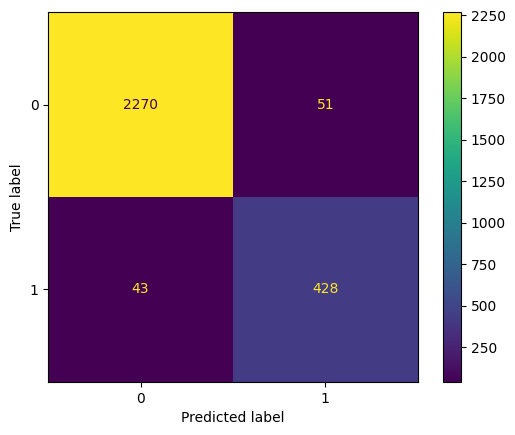

In [222]:
rf_2_preds = cv_rf_2.best_estimator_.predict(X_test)
cm_rf2 = confusion_matrix(y_test,rf_2_preds,labels = cv_rf_2.classes_)
disp_rf_2 = ConfusionMatrixDisplay(confusion_matrix=cm_rf2,display_labels=cv_rf_2.classes_)
disp_rf_2.plot(values_format='')

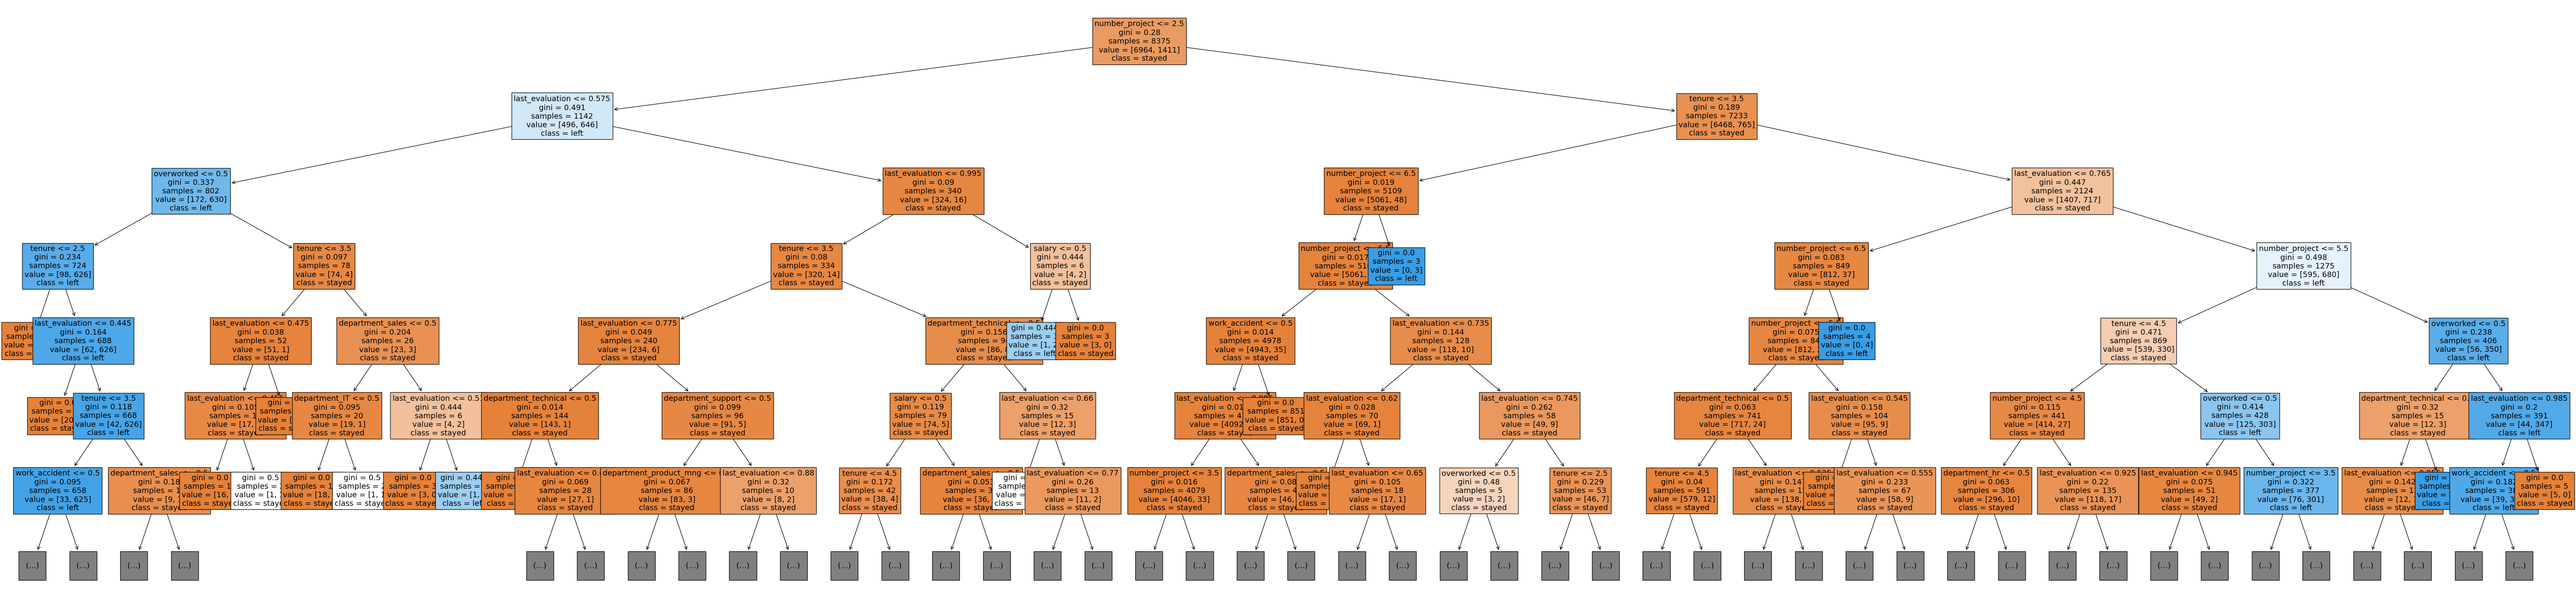

In [226]:
from sklearn.tree import plot_tree
plt.figure(figsize=(85,20))
plot_tree(cv_tree_2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [228]:
tree2_importances = pd.DataFrame(cv_tree_2.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.304275
last_evaluation,0.300635
tenure,0.298265
overworked,0.082299
salary,0.003656
work_accident,0.002932
department_technical,0.002625
department_sales,0.001568
department_support,0.001158
promotion_last_5years,0.000807


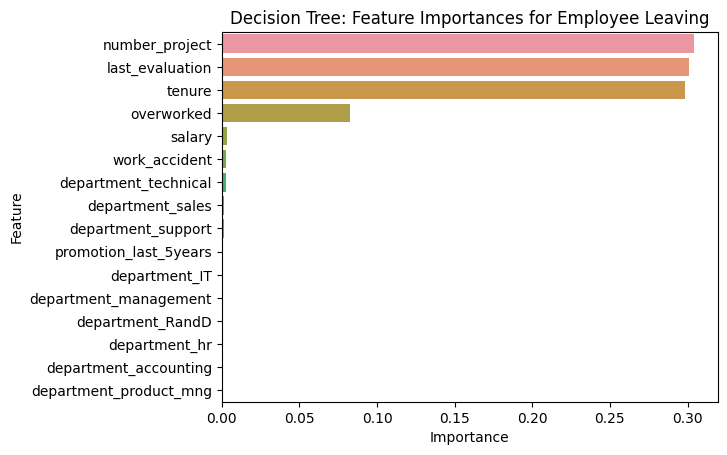

In [229]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

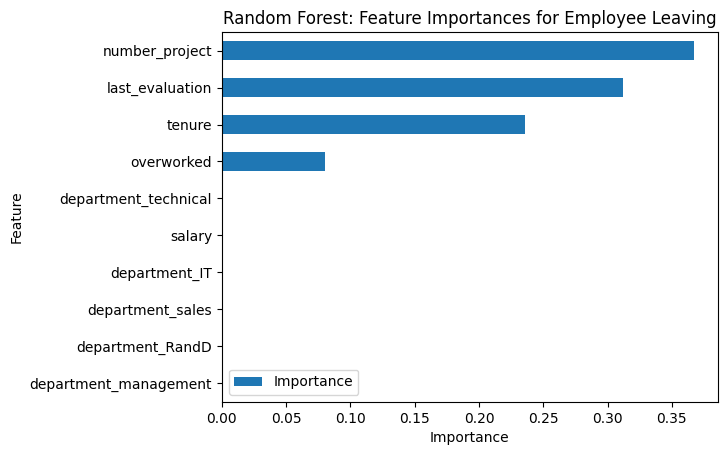

In [230]:
# Get feature importances
feat_impt = cv_rf_2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(cv_rf_2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

## Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.